# Erste Schritte: Plotten mit Pandas, Matplotlib und Seaborn

Mit [Pandas](https://pandas.pydata.org/) lassen sich Daten direkt visualisieren. Um das Laypout der resultierenden Plots weiter zu optimieren, kann die Python-Bibliothek Matplotlib genutzt werden, die sehr gut mit Pandas zusammenspielt. Eine auf [Matplotlib](https://matplotlib.org/) aufbauende und häufig genutzt Bibliothek zur Visualisierung ist [Seaborn](https://seaborn.pydata.org/).

Eine sehr gute und ausführliche Einführung in Pandas bietet ein eigenes Kapitel aus dem Data Science Handbook von Jake VanderPlas: [Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html). (Jake VanderPlas, Python Data Science Handbook. Essential Tools for Working with Data, https://jakevdp.github.io/PythonDataScienceHandbook/)

## Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Einlesen und Inspizieren der Daten

In [4]:
df = pd.read_csv('reden-bundesregierung.csv', parse_dates=['date'])

In [6]:
df.head().T

,0,1,2,3,4
person,Gerhard Schröder,Julian Nida-Rümelin,Gerhard Schröder,Gerhard Schröder,Gerhard Schröder
title,Rede des Bundeskanzlers zur Eröffnung der 52. ...,Redebeitrag von Staatsminister Nida-Rümelin in...,Interview mit Bundeskanzler Schröder in 'Berli...,Rede von Bundeskanzler Gerhard Schröder bei de...,Rede von Bundeskanzler Gerhard Schröder auf de...
date,2002-02-06 00:00:00,2002-02-01 00:00:00,2002-04-14 00:00:00,2005-03-08 00:00:00,2000-05-04 00:00:00
text,"es ist angekündigt worden, man sollte im Beruf...","Frau Präsidentin! An Sie gerichtet, Herr Börn...",Frage (Peter Hahne): Bevor wir uns über den Au...,"Einen Satz von Ihnen, Herr Dr. Bernotat, habe ...",diese Jahresversammlung der Hochschulrektorenk...
tokens,"['es', 'ist', 'angekündigt', 'worden', 'man', ...","['Frau', 'Präsidentin', ' ', 'An', 'Sie', 'ger...","['Frage', 'Peter', 'Hahne', 'Bevor', 'wir', 'u...","['Einen', 'Satz', 'von', 'Ihnen', 'Herr', 'Dr....","['diese', 'Jahresversammlung', 'der', 'Hochsch..."
ntokens,1911,1319,1512,2515,768


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   person   2983 non-null   object        
 1   title    2982 non-null   object        
 2   date     2983 non-null   datetime64[ns]
 3   text     2983 non-null   object        
 4   tokens   2983 non-null   object        
 5   ntokens  2983 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 140.0+ KB


In [8]:
df.columns

Index(['person', 'title', 'date', 'text', 'tokens', 'ntokens'], dtype='object')

## Anzahl der Reden nach Jahren

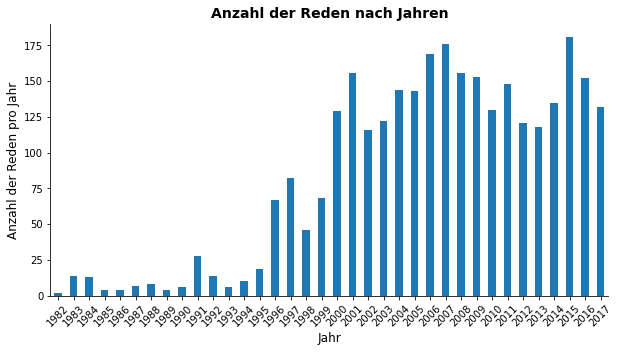

In [9]:
# Erstellen von Figure und Ax
fig, ax = plt.subplots(figsize=(10,5))

# Auswählen, Strukturieren und Auszählen der Daten
var = pd.crosstab(index=df.loc[:, 'date'].dt.year, columns='count')

# Plotten der Daten
var.plot(kind='bar', legend=False, ax=ax)

# Styling des Layouts
ax.set_title(label='Anzahl der Reden nach Jahren',
             weight='semibold', size=14)                
ax.set_xlabel('Jahr', size=12)             
ax.set_ylabel('Anzahl der Reden pro Jahr',size=12)             
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

# plt.savefig('Anzahl-Reden-Jahr.png', dpi=300, bbox_inches='tight')

## Anzahl der Reden nach Monaten

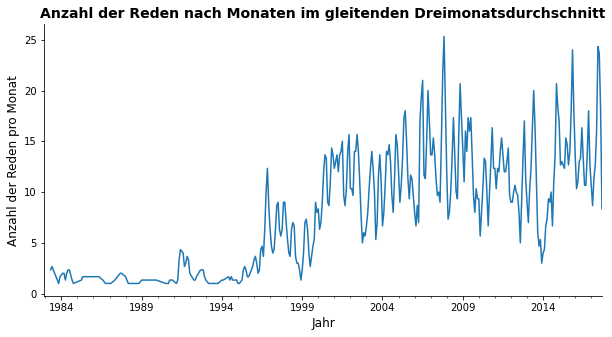

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

var_month = pd.crosstab(index=df.loc[:, 'date'].dt.to_period('M'), columns='count')
var_month.rolling(window=3).mean().plot(legend=False, ax=ax)

ax.set_title(label='Anzahl der Reden nach Monaten im gleitenden Dreimonatsdurchschnitt',
             weight='semibold', size=14)                
ax.set_xlabel('Jahr', size=12)             
ax.set_ylabel('Anzahl der Reden pro Monat',size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

# plt.savefig('Anzahl-Reden-Monat.png', dpi=300, bbox_inches='tight');

## Verteilung der Länge der Reden

In [67]:
df.loc[:, 'ntokens'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

count     2983.000000
mean      1939.533691
std       1285.096751
min          6.000000
25%        963.500000
50%       1599.000000
75%       2605.000000
95%       4425.600000
max      10459.000000
Name: ntokens, dtype: float64

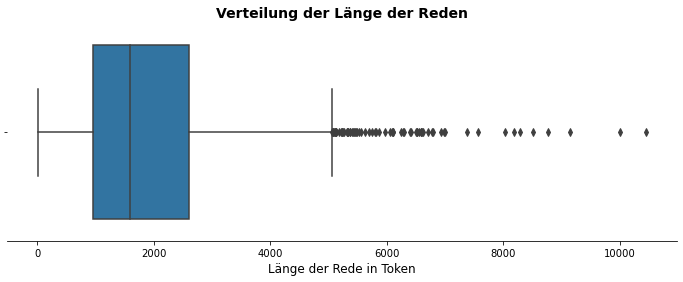

In [24]:
fig, ax = plt.subplots(figsize=(12,4))

# Einsatz von Seaborn:
# Datenspalte für x, Datenursprung und ax zum Plotten als Parameter übergeben
sns.boxplot(x='ntokens', data=df, ax=ax)

ax.set_title(label='Verteilung der Länge der Reden', weight='semibold', size=14)
ax.set_xlabel('Länge der Rede in Token', size=12)          

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

# plt.savefig('Boxplot-Reden-Länge.png', dpi=300, bbox_inches='tight')

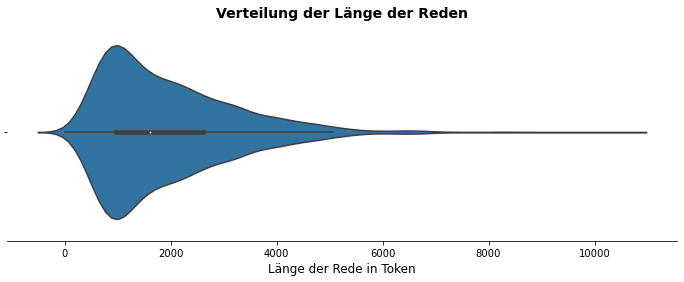

In [23]:
fig, ax = plt.subplots(figsize=(12,4))

sns.violinplot(x='ntokens', data=df, ax=ax)

ax.set_title(label='Verteilung der Länge der Reden', weight='semibold', size=14)
ax.set_xlabel('Länge der Rede in Token', size=12)
             
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

# plt.savefig('Violinplot-Reden-Länge.png', dpi=300, bbox_inches='tight')

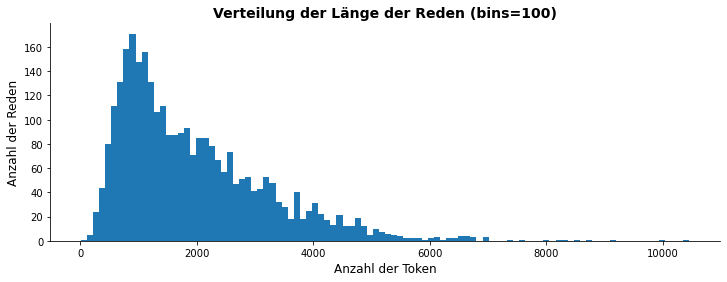

In [25]:
fig, ax = plt.subplots(figsize=(12,4))

df.loc[:, 'ntokens'].plot(kind='hist', bins=100, ax=ax)
                                 
ax.set_title(label='Verteilung der Länge der Reden (bins=100)',weight='semibold', size=14)
ax.set_xlabel('Anzahl der Token', size=12)
ax.set_ylabel('Anzahl der Reden', size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('Histogramm-Reden-Länge.png', dpi=300, bbox_inches='tight');

## Anzahl der Reden nach Redner:innen

In [11]:
person_counts = pd.crosstab(index=df.loc[:, 'person'], columns='count')

In [12]:
person_counts.sort_values(by='count', ascending=False).head(10)

col_0,count
person,
Angela Merkel,1128
Gerhard Schröder,417
Helmut Kohl,332
Bernd Neumann,323
Monika Grütters,246
Christina Weiss,204
Michael Naumann,64
Julian Nida-Rümelin,48
Thomas de Maizière,45


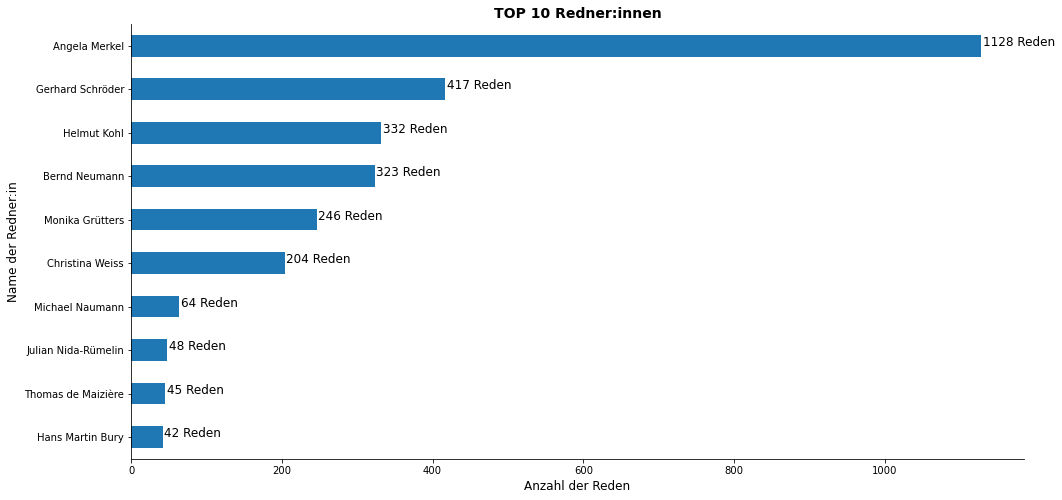

In [44]:
fig, ax = plt.subplots(figsize=(16,8))

person_counts = person_counts.sort_values(by='count', ascending=False).head(10)
person_counts.plot(kind='barh', ax=ax, legend=None)

ax.invert_yaxis() 

ax.set_title(label='TOP 10 Redner:innen', weight='semibold', size=14)
ax.set_xlabel('Anzahl der Reden', size=12)
ax.set_ylabel('Name der Redner:in', size=12)

for idx in range(len(person_counts.index)):
        ax.text(s=f'{int(person_counts.iloc[idx])} Reden',
                x=person_counts.iloc[idx] + 2,
                y=idx, size=12,
                color='black'
               )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('TOP10-Redner.png', dpi=300, bbox_inches='tight');

## Auswertungen zur TOP-Rednerin

In [13]:
df_merkel = df[df.loc[:, 'person'] == 'Angela Merkel']

In [14]:
df_merkel.shape

(1128, 6)

In [16]:
df_merkel_years = pd.crosstab(index=df_merkel.loc[:, 'date'].dt.year, columns='count')

In [17]:
df_merkel_years

col_0,count
date,
2005,4
2006,100
2007,122
2008,101
2009,97
2010,90
2011,96
2012,82
2013,82


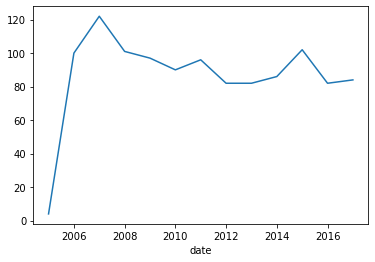

In [18]:
df_merkel_years.plot(legend=False);

### Verwendung von 'digital' in den Reden von Angela Merkel

In [19]:
df_merkel_digital = df_merkel[df_merkel.loc[:,'text'].str.contains('[D]igital')]

In [24]:
df_merkel_digital_years = pd.crosstab(index=df_merkel_digital.loc[:, 'date'].dt.year, 
                                      columns='count', 
                                      normalize=True)

In [25]:
df_merkel_digital_years 

col_0,count
date,
2006,0.011494
2007,0.028736
2008,0.017241
2009,0.017241
2010,0.022989
2011,0.017241
2012,0.005747
2013,0.045977
2014,0.160920


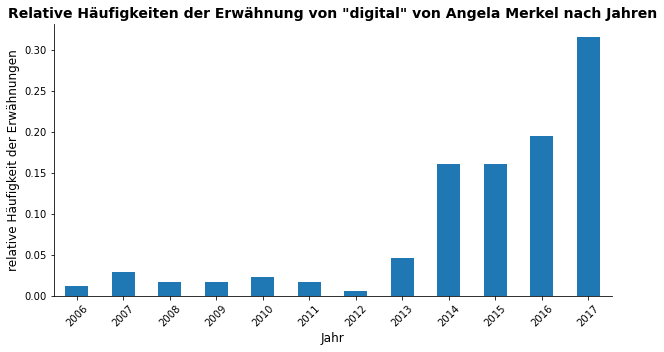

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

df_merkel_digital_years.plot(kind='bar', legend=False, ax=ax)

ax.set_title(label='Relative Häufigkeiten der Erwähnung von "digital" von Angela Merkel nach Jahren',
             weight='semibold', size=14)                
ax.set_xlabel('Jahr', size=12)             
ax.set_ylabel('relative Häufigkeit der Erwähnungen',size=12)             
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('Anzahl-Erwähnungen-digital-Jahr.png', dpi=300, bbox_inches='tight');

In [29]:
df_merkel_digital_month = pd.crosstab(index=df_merkel_digital.loc[:, 'date'].dt.to_period('M'), 
                                      columns='count',
                                      normalize=True)

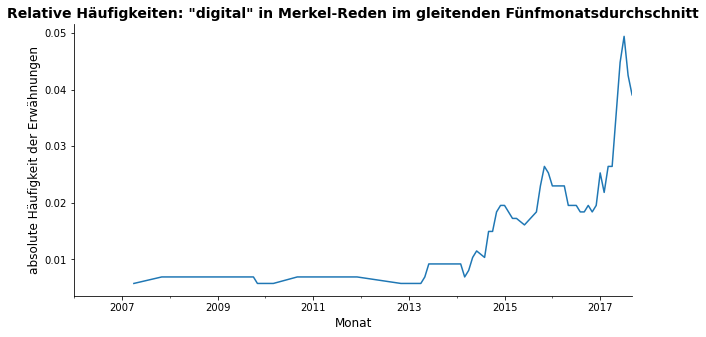

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

df_merkel_rolling = df_merkel_digital_month.rolling(window=5).mean().plot(kind='line', 
                                                                          legend=False,
                                                                          ax=ax)

ax.set_title(label='Relative Häufigkeiten: "digital" in Merkel-Reden im gleitenden Fünfmonatsdurchschnitt',
             weight='semibold', size=14)                
ax.set_xlabel('Monat', size=12)             
ax.set_ylabel('absolute Häufigkeit der Erwähnungen',size=12)  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('Anzahl-Erwähnungen-digital-Monat-Rolling.png', dpi=300, bbox_inches='tight');